# Imputation Tryouts

## Preliminaries

In [1]:
import os
import sys
import numpy as np

from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = os.getcwd()
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus

from morpheus import Morpheus
from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

# Visuals
from morpheus.graph import to_dot
from IPython.display import Image, display
from IPython.core.display import HTML 

## Setup

Data, fit and making a suitable schema.

In [2]:
data, _ = default_dataset(random_state=10)
data.head()

,0,1,2,3,4,5,6,y
0,-0.481421,0.151874,-3.496227,0.060245,-3.203806,-1.372228,-2.347602,0
1,1.805053,1.513298,0.999596,3.624717,0.441319,-1.056231,-0.319972,1
2,3.131337,0.820474,4.246783,-2.461378,-1.855715,1.897367,-1.244252,0
3,-0.442853,0.934070,2.914762,-2.871647,0.216938,-2.183579,0.867336,0
4,0.369072,2.812554,-1.471211,0.518364,0.312299,-3.355049,-1.760576,0


In [3]:
data = data.values
n_rows, n_cols = data.shape

In [23]:
m = Morpheus(sel_algo='random', pred_algo='mrai', random_state=997)
m.fit(data)

In [24]:
q_code = np.array([-1,  0,  -1,  0,  -1,  -1,  0,  1])
q_code 

array([-1,  0, -1,  0, -1, -1,  0,  1])

In [25]:
m.predict(data, q_code)


                We have selected    1 model(s) 
                at threshold:       0.30
                with model ids:     [{'f-07'}]
                

dict_keys(['I(d-05)', 'I(d-04)', 'I(d-02)', 'I(d-00)', 'd-03'])


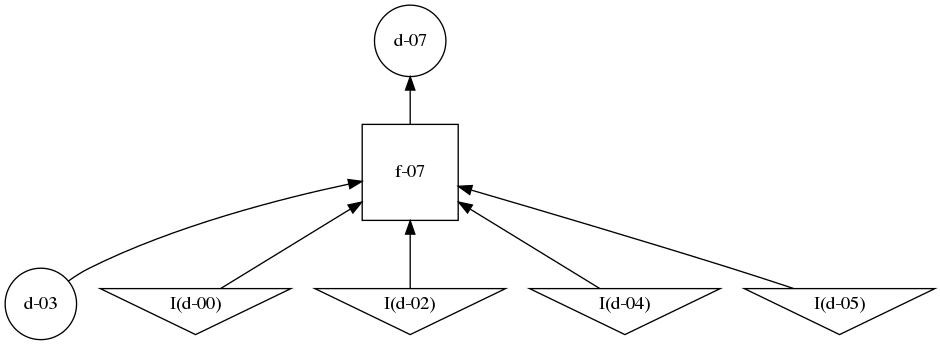

In [26]:
# show your work
q_grph = m.q_grph
fname = to_dot(q_grph, fname='q')
!dot -T png ./tmp/q.dot > ./tmp/q.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/q.png'))

In [8]:
g = m.q_grph

In [9]:
g.nodes()

NodeView(('d-05', 'd-06', 'd-02', 'f-05', 'I(d-00)', 'I(d-04)', 'I(d-07)', 'd-01', 'd-03', 'd-00', 'f-03', 'd-04', 'f-02', 'd-07', 'f-07'))

In [10]:
g.nodes()['I(d-00)']

{'bipartite': 'data',
 'kind': 'imputation',
 'idx': 0,
 'tgt': [0],
 'fi': 0.10981764674953258,
 'shape': '"invtriangle"',
 'function': <function morpheus.composition.compose.o.<locals>.sequential_composition(*function_arguments)>}

In [11]:
#g.nodes()['f-04'] 

In [12]:
m.f_list.keys()

dict_keys(['d-03', 'd-01', 'I(d-07)', 'I(d-04)', 'I(d-00)', 'd-06', 'd-05', 'f-05', 'd-02', 'f-03', 'd-00', 'f-02', 'd-04', 'f-07', 'd-07'])

In [13]:
m.f_list['I(d-00)'](data).shape

(800,)

In [14]:
m.f_list['d-01'](data).shape

(800,)

In [15]:
m.f_list['d-07'](data)

array([0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.